In [32]:
from datascience import *
%matplotlib inline
path_data = '../../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Assessing Models ###
In data science, a "model" is a set of assumptions about data. Often, models include assumptions about chance processes used to generate data. 

Sometimes, data scientists have to decide whether or not their models are good. In this section we will discuss an example of making such decisions. In later sections we will use the methods developed here as the building blocks of a general framework for testing hypotheses.

### Mendel's Pea Flowers ###
[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics. 

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

Let's analyze the data from one such experiment to see if Mendel's model was good.

In a particular variety, each plant has either purple flowers or white. The color in each plant is unaffected by the colors in other plants. Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

### Mendel's Model ###
For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

#### Approach to Assessment ####
To go about assessing Mendel's model, we can simulate plants under the assumptions of the model and see what it predicts. Then we will be able to compare the predictions with the data that Mendel recorded.

### The Statistic ####
Our goal is to see whether or not Mendel's model is good. We need to simulate a statistic that will help us make this decision. 

If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. If the model is not good, the percent purple-flowering will be away from 75%. It may be higher, or lower; the direction doesn't matter.

The key for us is the *distance* between 75% and the percent of purple-flowering plants in the sample. Big distances are evidence that the model isn't good.

Our statistic, therefore, is the **distance between the sample percent and 75%**:

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$

### Predicting the Statistic Under the Model ###
To see how big the distance would be if Mendel's model were true, we can use `sample_proportions` to simulate the distance under the assumptions of the model.

First, we have to figure out how many times to sample. To do this, remember that we are going to compare our simulation with Mendel's plants. So we should simulate the same number of plants that he had.

Mendel grew a lot of plants. There were 929 plants of the variety corresponding to this model. So we have to sample 929 times. 

#### Generating One Value of the Statistic ####

The steps in the calculation:

- Sample 929 times at random from the distribution specified by the model and find the sample proportion in the purple-flowering category. 
- Multiply the proportion by 100 to get a pecent.
- Subtract 75 and take the absolute value of the difference.

That's the statistic: the distance between the sample percent and 75.

We will start by defining a function that takes a proportion and returns the absolute difference between the corresponding percent and 75.

In [39]:
def distance_from_75(p):
    return abs(100*p - 75)

To simulate one value of the distance between the sample percent of purple-flowering plants and 75%, under the assumptions of Mendel's model, we have to first simulate the proportion of purple-flowering plants among 929 plants under the assumption of the model, and then calculate the discrepancy from 75%.

In [40]:
model_proportions = [0.75, 0.25]

In [48]:
proportion_purple_in_sample = sample_proportions(929, model_proportions).item(0)
distance_from_75(proportion_purple_in_sample)

1.7491926803014053

That's one simulated value of the distance between the sample percent of purple-flowering plants and 75% as predicted by Mendel's model. 

#### Running the Simulation ####
To get a sense of how variable the distance could be, we have to simulate it many more times.

We will generate 10,000 values of the distance. As before, we will first use the code we developed above to define a function that returns one simulated value Mendel's hypothesis.

In [42]:
def one_simulated_distance():
    proportion_purple_in_sample = sample_proportions(929, model_proportions).item(0)
    return distance_from_75(proportion_purple_in_sample)

Next, we will use a `for` loop to create 10,000 such simulated distances.

In [43]:
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

### The Prediction ###
The empirical histogram of the simulated values shows the distribution of the distance as predicted by Mendel's model.

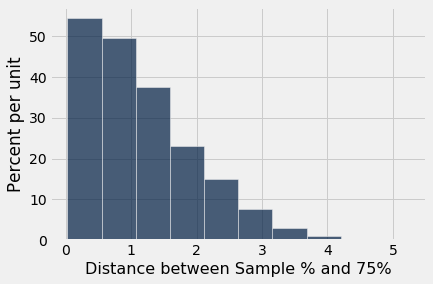

In [44]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()

Look on the horizontal axis to see the typical values of the distance, as predicted by the model. They are rather small. For example, a high proportion of the distances are in the range 0 to 1, meaning that for a high proportion of the samples, the percent of purple-flowering plants is within 1% of 75%, that is, the sample percent is in the range 74% to 76%.

### Comparing the Prediction and the Data ###
To assess the model, we have to compare this prediction with the data. Mendel recorded the number of purple and white flowering plants. Among the 929 plants that he grew, 705 were purple flowering. That's just about 75.89%.

In [45]:
705 / 929

0.7588805166846071

So the observed value of our statistic – the distance between Mendel's sample percent and 75 – is about 0.89:

In [46]:
observed_statistic = distance_from_75(705/929)
observed_statistic

0.8880516684607045

Just by eye, locate roughly where 0.89 is on the horizontal axis of the histogram. You will see that it is clearly in the heart of the distribution predicted by Mendel's model.

The cell below redraws the histogram with the observed value plotted on the horizontal axis.

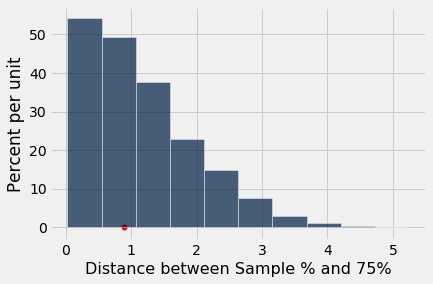

In [47]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.scatter(observed_statistic, 0, color='red', s=30);

The observed statistic is like a typical distance predicted by the model. By this measure, the data are consistent with the histogram that we generated under the assumptions of Mendel's model. This is evidence in favor of the model.